# Лабораторная работа 4

1. Выбрать бизнес-цель для набора данных по Вашему варианту задания для решения задачи кластеризации.

2. Выполнить понижение размерности и визуализацию данных.

3. Выполнить выбор количества кластеров на основе оценки инерции и коэффициента силуэта.

4. Выполнить кластерный анализ с применением иерархического и неиерархического алгоритма кластеризации.

5. Оценить качество решения.

6. Все выводы и программный код должны быть оформлены в виде ноутбука. Для выполнения данной лабораторной работы следует создать новый файл-ноутбук.

7. Разобраться с основными возможностями библиотеки scikit-learn (https://scikit-learn.org/1.5/).

In [2]:
import pandas as pd

from pathlib import Path

dataset_path = Path('../datasets/Food.csv')
df = pd.read_csv(dataset_path)
df

,Category,Item,Serving Size,Calories,Trans Fat,Cholesterol,Carbohydrates,Sugars,Protein,Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,0.0,260,31,3,17,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,0.0,25,30,3,18,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,0.0,45,29,2,14,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,0.0,285,30,2,21,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,0.0,50,30,2,21,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,0.5,45,80,64,12,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,1.0,55,106,85,15,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,0.0,30,53,43,8,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,1.0,60,114,103,21,0,60,6


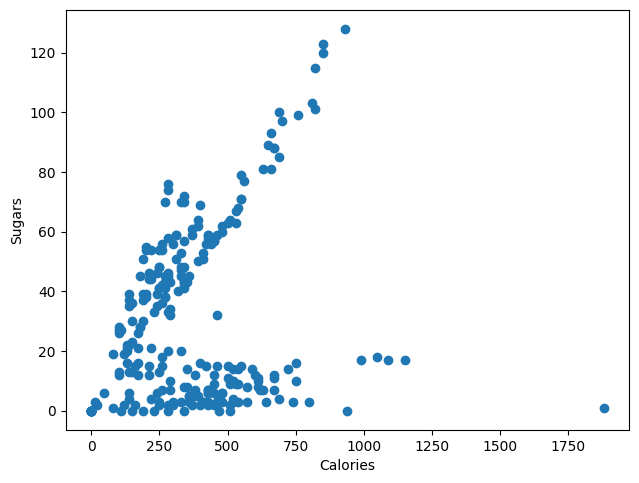

In [3]:
from matplotlib import pyplot as plt
from extra.visual import draw_data_2d

plt.figure(figsize=(16, 12))
draw_data_2d(df, 3, 7, subplot=plt.subplot(2, 2, 1))

array([[1.51000000e+02, 1.54000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.67000000e+02, 1.70000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.68000000e+02, 1.71000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [5.12000000e+02, 5.14000000e+02, 1.72347190e+03, 3.70000000e+01],
       [5.13000000e+02, 5.16000000e+02, 2.26073598e+03, 1.13000000e+02],
       [5.15000000e+02, 5.17000000e+02, 4.25553545e+03, 2.60000000e+02]])

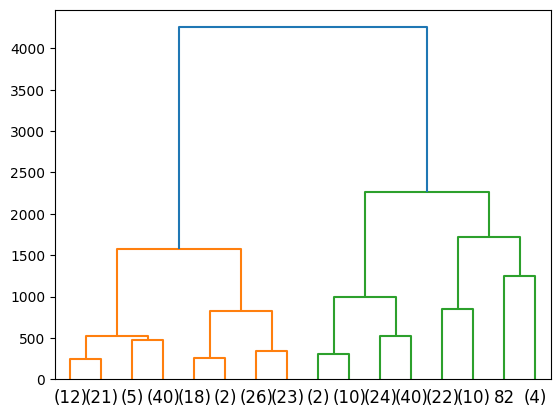

In [4]:
from src.extra.visual import draw_dendrogram
from extra.clusters import get_linkage_matrix, run_agglomerative

df_no_cat = df.select_dtypes(exclude=['object'])

tree = run_agglomerative(df_no_cat)
linkage_matrix = get_linkage_matrix(tree)
display(linkage_matrix)
draw_dendrogram(linkage_matrix)

array([125,  44,   7, 123, 178, 124, 121, 116, 180, 164, 176, 166, 117,
       120, 167, 138, 181, 165, 118, 122, 182, 177, 119, 134, 114, 132,
       115, 214, 215, 196, 197, 216, 217, 204, 205,  10, 136,  34,  93,
       168,  31,  32, 126, 128, 201, 202, 127, 193,  45,  40, 173, 191,
         1, 174, 172, 172, 135, 137,   4, 194, 130, 198, 170, 192, 203,
       175,   5, 161, 175,   5, 200, 131, 199, 171, 195, 129, 133,   2,
       107,  38, 162, 206, 218, 179,  86,   3,  35,  87, 163,  41,   8,
        42,   9,  43,   6,  39,  36,  11, 169,  78,  71,  73,  94,  37,
        91,  92,  72,  24,  23,  55,  81,  95,  48,  75,  70,  70,  70,
        70,  81,  96,  49,  75,  70,  70,  70,  70,  81,  95,  48,  75,
        77,  83,  74,  29,  30,  33,  70,  70,  70,  70,  70,  82,  97,
       100,  76,  70,  70,  70, 105, 108,  46,  60,  26, 158,  60,  25,
       158,  61,  25, 159, 108,  47,  28,  77,  84, 112, 110,  67,  17,
       110,  67,  17, 111,  68,  18,  85, 113, 109,  20, 155, 14

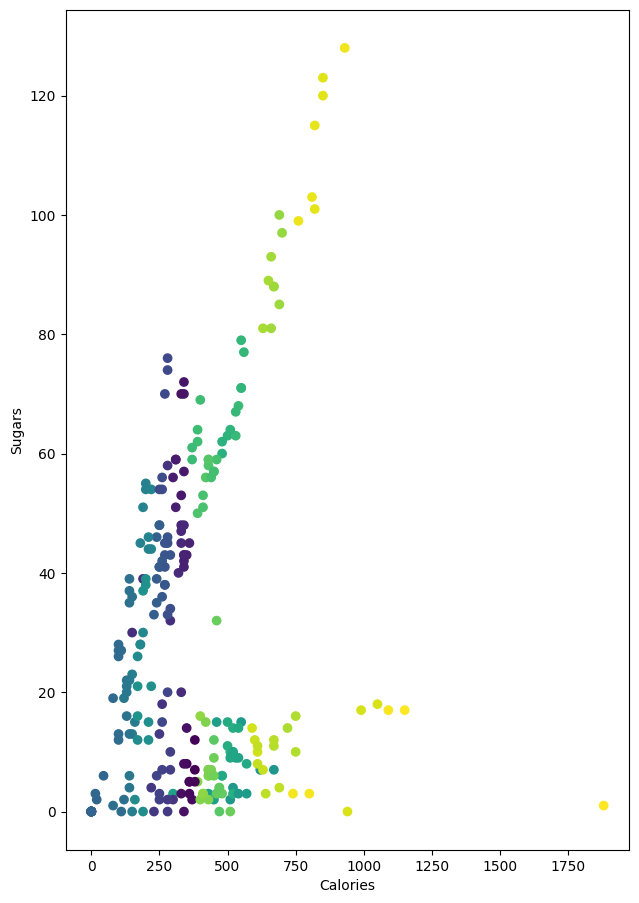

In [5]:
from scipy.cluster import hierarchy

plt.figure(figsize=(16, 24))
result = hierarchy.fcluster(linkage_matrix, 10, criterion="distance")
display(result)
draw_data_2d(df_no_cat, 0, 4, result, subplot=plt.subplot(2, 2, 1))

Cluster 1 (138):
0, 1, 35, 37, 38, 40, 41, 48, 49, 78, 79, 84, 86, 87, 89, 90, 91, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 184, 187, 188, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 217, 218, 220, 221, 232, 233, 234, 235, 236, 237, 238, 239, 240, 257

--------
Cluster 2 (105):
2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 36, 39, 42, 43, 44, 45, 46, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 83, 85, 88, 94, 98, 153, 156, 159, 179, 180, 183, 18

array([[1.99275362e+02, 3.62318841e-03, 1.69202899e+01, 3.37536232e+01,
        2.66956522e+01, 6.33333333e+00, 1.11666667e+01, 1.52753623e+01,
        2.59420290e+00],
       [4.97809524e+02, 3.90476190e-01, 7.94761905e+01, 5.61333333e+01,
        2.92857143e+01, 1.95714286e+01, 5.86666667e+00, 2.59333333e+01,
        1.27238095e+01],
       [9.40000000e+02, 6.76470588e-01, 2.12058824e+02, 1.03411765e+02,
        5.24117647e+01, 3.17058824e+01, 3.64705882e+00, 3.65882353e+01,
        1.86470588e+01]])

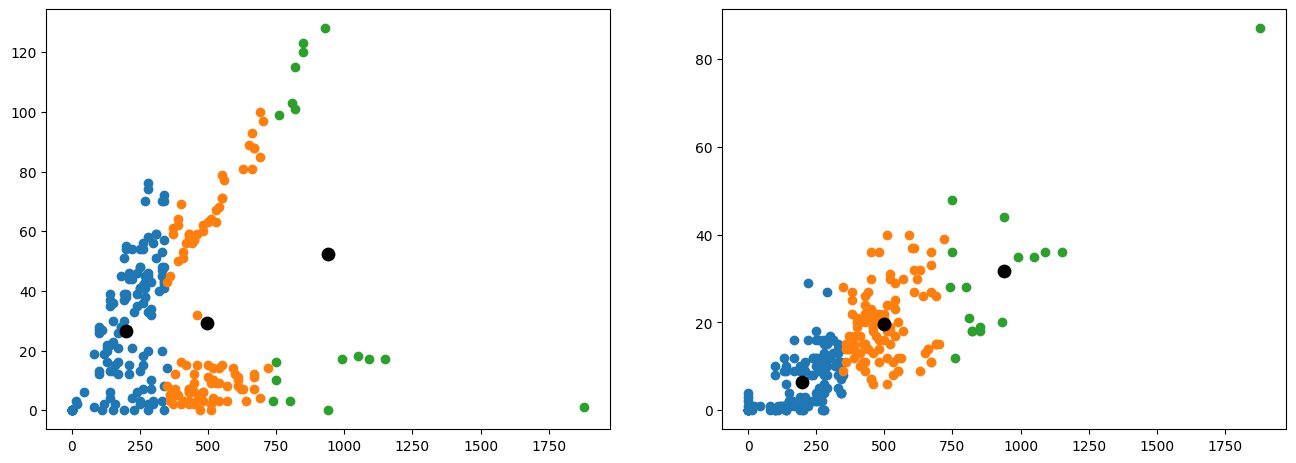

In [6]:
from extra.clusters import print_cluster_result, run_kmeans
from extra.visual import draw_cluster_results

random_state = 10

labels, centers = run_kmeans(df_no_cat, 3, random_state)
print_cluster_result(df_no_cat, 3, labels)
plt.figure(figsize=(16, 12))

display(centers)

draw_cluster_results(df_no_cat, 0, 4, labels, centers, subplot=plt.subplot(2, 2, 1))
draw_cluster_results(df_no_cat, 0, 5, labels, centers, subplot=plt.subplot(2, 2, 2))

array([[-2.12644338e+01,  2.15670903e+02],
       [-1.23202593e+02,  3.29069868e+00],
       [-2.70756881e+00, -1.85837003e+00],
       [ 1.29798992e+02,  2.08917959e+02],
       [ 2.78131715e+01, -3.24872737e+00],
       [ 1.14240182e+02,  2.27121241e+02],
       [ 1.31698250e+02,  1.73123757e+02],
       [ 1.90513699e+02,  1.59945600e+02],
       [ 3.42565123e+01, -2.01010523e+01],
       [ 9.30143009e+01, -3.31341232e+01],
       [ 5.18685308e+01, -2.77232528e+01],
       [ 1.00799457e+02, -3.89101266e+01],
       [ 1.79896042e+02,  1.64040965e+02],
       [ 2.38537661e+02,  1.50792380e+02],
       [ 8.23879506e+01, -2.92808327e+01],
       [ 1.41001263e+02, -4.23360459e+01],
       [ 3.33527113e+01, -2.47554835e+01],
       [ 9.19647029e+01, -3.79779193e+01],
       [ 2.16597606e+02,  1.85587554e+02],
       [ 1.33046070e+02,  1.69080350e+02],
       [ 2.58939136e+01, -2.21571843e+01],
       [ 4.45101267e+01, -2.52020544e+01],
       [ 2.23693197e+02,  1.65147101e+02],
       [ 1.

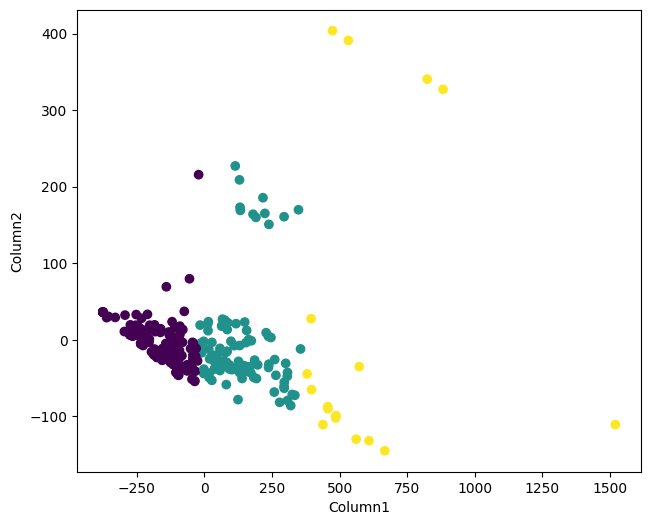

In [7]:
from sklearn.decomposition import PCA


reduced_data = PCA(n_components=2).fit_transform(df_no_cat)
display(reduced_data)

plt.figure(figsize=(16, 6))
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels,
    subplot=plt.subplot(1, 2, 1),
)

In [ ]:
# from extra.clusters import fit_kmeans
# from extra.visual import draw_clusters
# 
# kmeans = fit_kmeans(reduced_data, 2, random_state)
# draw_clusters(reduced_data, kmeans)
